<a href="https://colab.research.google.com/github/harshhrawte/Perceptron/blob/main/single_layer_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train Accuracy: 86.50%
Test Accuracy: 86.00%


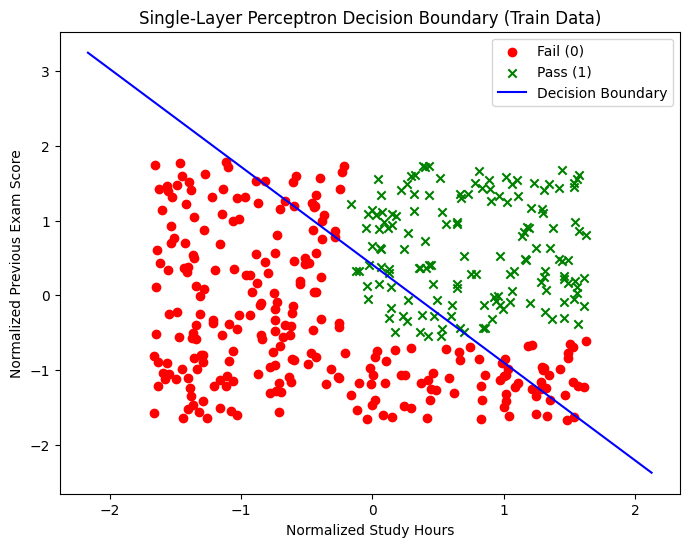

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/student_exam_data.csv')
df.head()
X = df[['Study Hours', 'Previous Exam Score']].values
y = df['Pass/Fail'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# BIAS TERM
X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test]

# Initialize weights
weights = np.zeros(X_train_bias.shape[1])

# Perceptron learning rate and epochs
lr = 0.01
epochs = 1000

def step_function(x):
    return np.where(x >= 0, 1, 0)

# Training loop
for epoch in range(epochs):
    for xi, target in zip(X_train_bias, y_train):
        z = np.dot(xi, weights)
        y_pred = step_function(z)
        error = target - y_pred
        weights += lr * error * xi

# Predict
def predict(X):
    z = np.dot(X, weights)
    return step_function(z)

train_pred = predict(X_train_bias)
test_pred = predict(X_test_bias)
print(f"Train Accuracy: {np.mean(train_pred == y_train)*100:.2f}%")
print(f"Test Accuracy: {np.mean(test_pred == y_test)*100:.2f}%")


plt.figure(figsize=(8,6))
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], color='red', label='Fail (0)', marker='o')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], color='green', label='Pass (1)', marker='x')
x1_vals = np.array([X_train[:, 0].min()-0.5, X_train[:, 0].max()+0.5])
x2_vals = (-weights[0] - weights[1]*x1_vals) / weights[2]

plt.plot(x1_vals, x2_vals, 'b-', label='Decision Boundary')
plt.xlabel('Normalized Study Hours')
plt.ylabel('Normalized Previous Exam Score')
plt.legend()
plt.title('Single-Layer Perceptron Decision Boundary (Train Data)')
plt.show()

Sample of the dataset:
   Study Hours  Previous Exam Score  Pass/Fail
0     4.370861            81.889703          0
1     9.556429            72.165782          1
2     7.587945            58.571657          0
3     6.387926            88.827701          1
4     2.404168            81.083870          0

Train Accuracy: 86.50%
Test Accuracy: 86.00%


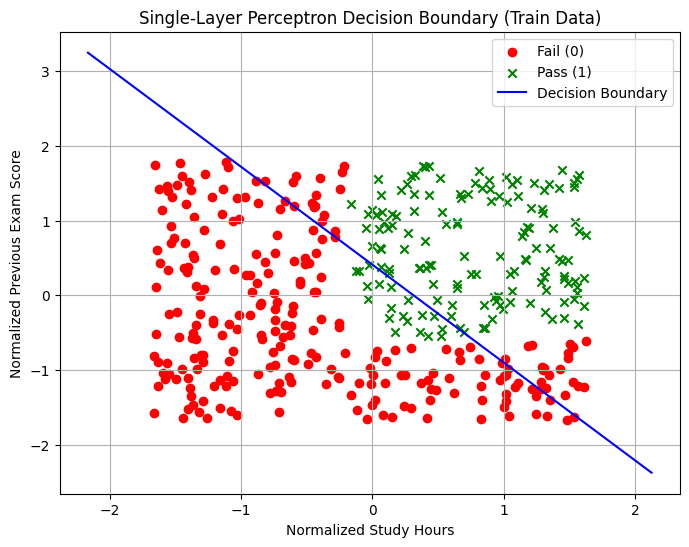

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv('/content/student_exam_data.csv')

# Show first few rows of the dataset (for presentation)
print("Sample of the dataset:")
print(df.head())

# Features and target
X = df[['Study Hours', 'Previous Exam Score']].values
y = df['Pass/Fail'].values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add bias term (column of ones)
X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test]

# Initialize weights
weights = np.zeros(X_train_bias.shape[1])

# Perceptron parameters
lr = 0.01
epochs = 1000

# Step activation function
def step_function(x):
    return np.where(x >= 0, 1, 0)

# Training loop
for epoch in range(epochs):
    for xi, target in zip(X_train_bias, y_train):
        z = np.dot(xi, weights)
        y_pred = step_function(z)
        error = target - y_pred
        weights += lr * error * xi

# Prediction function
def predict(X):
    z = np.dot(X, weights)
    return step_function(z)

# Accuracy evaluation
train_pred = predict(X_train_bias)
test_pred = predict(X_test_bias)
print(f"\nTrain Accuracy: {np.mean(train_pred == y_train)*100:.2f}%")
print(f"Test Accuracy: {np.mean(test_pred == y_test)*100:.2f}%")

# Plot decision boundary on training data
plt.figure(figsize=(8,6))
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], color='red', label='Fail (0)', marker='o')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], color='green', label='Pass (1)', marker='x')

# Decision boundary calculation
x1_vals = np.array([X_train[:, 0].min()-0.5, X_train[:, 0].max()+0.5])
x2_vals = (-weights[0] - weights[1]*x1_vals) / weights[2]

plt.plot(x1_vals, x2_vals, 'b-', label='Decision Boundary')
plt.xlabel('Normalized Study Hours')
plt.ylabel('Normalized Previous Exam Score')
plt.legend()
plt.title('Single-Layer Perceptron Decision Boundary (Train Data)')
plt.grid(True)
plt.show()
